In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [227]:
df = pd.read_csv('survey_results_public.csv')
df.set_index("ResponseId", inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89184 entries, 1 to 89184
Data columns (total 83 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Q120                                 89184 non-null  object 
 1   MainBranch                           89184 non-null  object 
 2   Age                                  89184 non-null  object 
 3   Employment                           87898 non-null  object 
 4   RemoteWork                           73810 non-null  object 
 5   CodingActivities                     73764 non-null  object 
 6   EdLevel                              87973 non-null  object 
 7   LearnCode                            87663 non-null  object 
 8   LearnCodeOnline                      70084 non-null  object 
 9   LearnCodeCoursesCert                 37076 non-null  object 
 10  YearsCode                            87435 non-null  object 
 11  YearsCodePro                

(array([0.33, 1.58, 2.83, 4.08, 5.33, 6.58, 7.83, 9.08]),
 [Text(0.33, 0, '18-24 years old'),
  Text(1.58, 0, '25-34 years old'),
  Text(2.83, 0, '35-44 years old'),
  Text(4.08, 0, '45-54 years old'),
  Text(5.33, 0, '55-64 years old'),
  Text(6.58, 0, '65 years or older'),
  Text(7.83, 0, 'Prefer not to say'),
  Text(9.08, 0, 'Under 18 years old')])

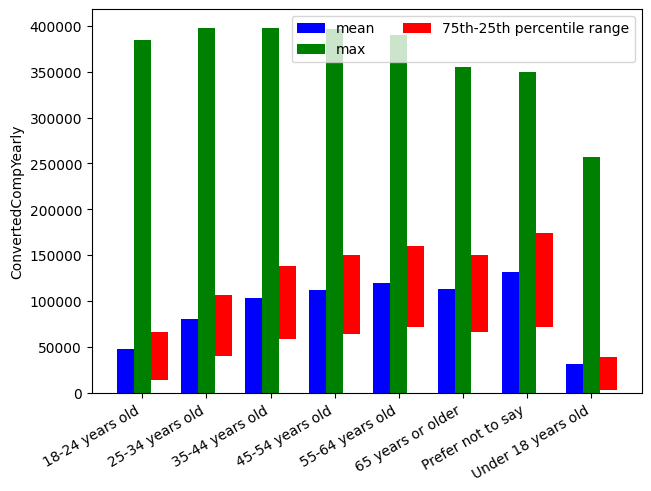

In [228]:
filtered = df[df["ConvertedCompYearly"].isna() == False]
q_hi = filtered["ConvertedCompYearly"].quantile(0.99) #get the 99th percentile (outliers, probably data errors)
filtered = filtered[filtered["ConvertedCompYearly"] < q_hi]
grouped = filtered.groupby("Age")["ConvertedCompYearly"]

indexes = grouped.mean().index
bar_width = 0.33
x = np.arange(len(grouped.mean().index))
adjustedX = x * 1.25
fig, ax = plt.subplots(layout='constrained')

bar = ax.bar(adjustedX, grouped.mean(), bar_width, color="blue", label="mean")
max_bar = ax.bar(adjustedX + bar_width, grouped.max(), bar_width, color="green", label="max")

q75 = grouped.quantile(0.75)
q25 = grouped.quantile(0.25)
bar_height = q75 - q25
box_bar = ax.bar(adjustedX + bar_width*2, bar_height, bar_width, bottom=q25, color="red", label="75th-25th percentile range")

ax.legend(ncols=2, loc="upper right")
ax.set_xticks(adjustedX + bar_width, indexes)
ax.set_ylabel('ConvertedCompYearly')
plt.xticks(rotation=30, ha="right")